In [537]:
#####################################################################################################
######################### MOVIES DATA SET  ##########################################################
#####################################################################################################


In [538]:
#################################################################
############ Part I - Importing
#################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [539]:
column_names = ['user_id','item_id','rating','timestamp']                     #### our data is not structured

In [540]:
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [541]:
df.head()                                #### now it makes more sence with cols names

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [542]:
movie_df = pd.read_csv('Movie_Id_Titles')

In [543]:
movie_df.head()                          #### primary key is item_id from both tables

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [544]:
df = pd.merge(df,movie_df,on='item_id')

In [545]:
df.head()                             #### merged both dataframe into one with the help of primary key

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [546]:
#####################################################################
########################### Part II - Duplicates
#####################################################################


In [547]:
df[df.duplicated()]                         #### data is clean

,user_id,item_id,rating,timestamp,title


In [548]:
####################################################################
############## Part III - Missing Values
####################################################################


In [549]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])


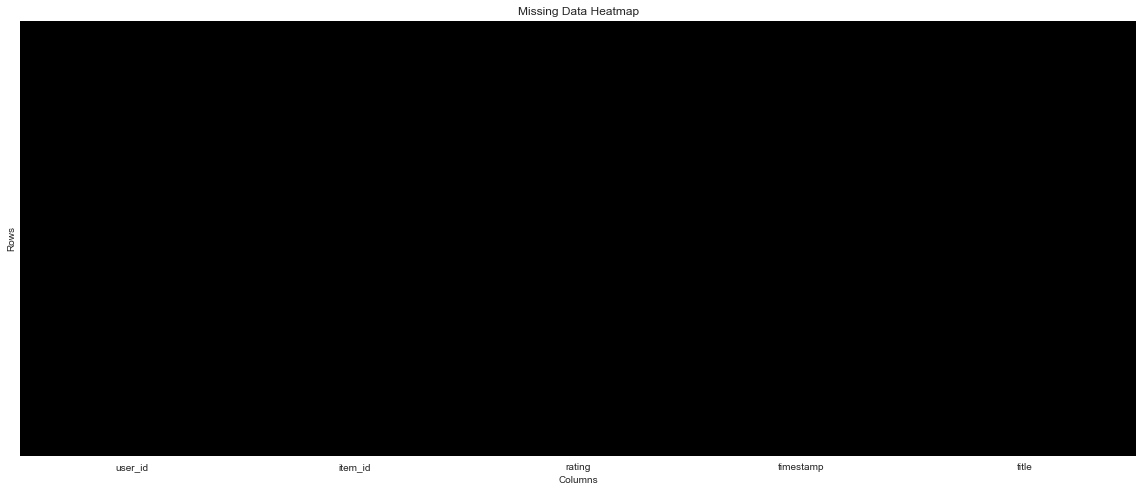

In [550]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### why Amelia, if you coming from R then you might have used Amelia package which detects the missing value 
#### On July 2, 1937, Amelia disappeared over the Pacific Ocean while attempting to become the first female pilot to circumnavigate the world

In [551]:
df.isnull().any()                          #### no missing values either

user_id      False
item_id      False
rating       False
timestamp    False
title        False
dtype: bool

In [552]:
####################################################################
############## Part IV - Feature Engineering
####################################################################


In [553]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [554]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()               #### but this can be misleading

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [555]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()               #### here we see more clear picture

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [556]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())             #### making a dataframe as ratings to see the mean

In [557]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [558]:
ratings['number_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())         #### this will be more helpful to see how many people reviewed each movie


In [559]:
ratings.head()                  #### much better and easy to understand

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [560]:
######################################################################
############## Part V - EDA
######################################################################


In [561]:
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


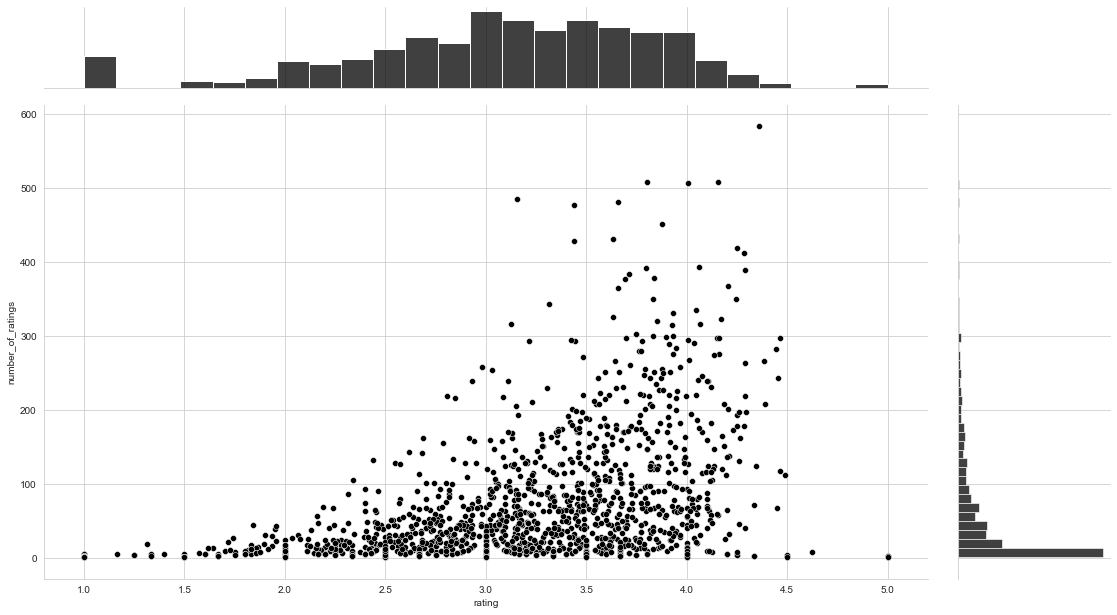

In [562]:
custom = {0:'purple',
         1:'red'}

g = sns.jointplot(x=ratings.rating,y=ratings.number_of_ratings,data=ratings,color='black')

g.fig.set_size_inches(17,9)


#### seems like as the ratings go up the number of people who reviewed also goes up except some obvious outliers

In [563]:
ratings[ratings.rating == 5]                #### all these movies been given 5 star ratings but 
                                            #### theres only one person who reviewed it so this will throw off our recommendation system

,rating,number_of_ratings
title,,
Aiqing wansui (1994),5.0,1
Entertaining Angels: The Dorothy Day Story (1996),5.0,1
"Great Day in Harlem, A (1994)",5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
"Saint of Fort Washington, The (1993)",5.0,2
Santa with Muscles (1996),5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


In [564]:
ratings.number_of_ratings.sort_values(ascending=False)             #### this is more realistic approach

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: number_of_ratings, Length: 1664, dtype: int64

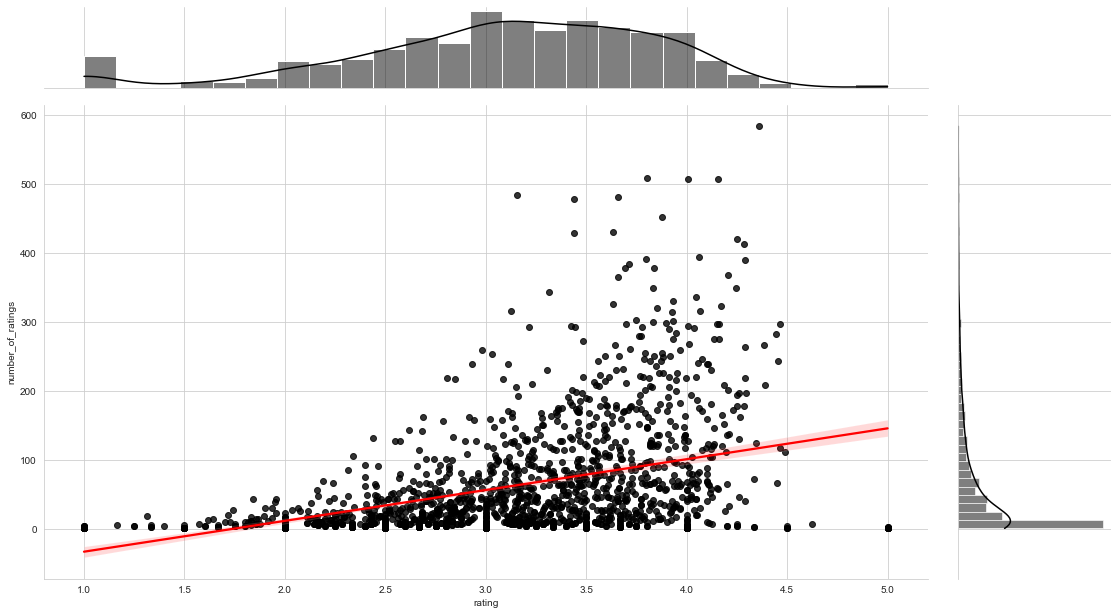

In [565]:
g = sns.jointplot(x='rating',y='number_of_ratings',data=ratings,kind='reg',color='black',joint_kws={'line_kws':{'color':'red'}})

g.fig.set_size_inches(17,9)

#### definately we do some correlation here

In [566]:
######################################################################
############## Part VI - BASIC RECOMMENDATION SYSTEMS
######################################################################


In [567]:
from scipy.stats import pearsonr                  #### lets see this with pearsonr

In [568]:
co_eff, p_value = pearsonr(ratings.rating,ratings.number_of_ratings)

In [569]:
co_eff

0.43098910751464226

In [570]:
p_value                         #### we reject null hypothesis

3.125697201444568e-76

In [571]:
df.groupby(['user_id','title'])['rating'].sum().unstack().fillna(0)     #### this way we can see people who reviewed one more and gave rating, did they give any other movies similar ratings


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [572]:
starwars_user_rating = df.groupby(['user_id','title'])['rating'].sum().unstack()['Star Wars (1977)']

starwars_user_rating                    #### user ratings only related to star wars 1977 movie

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [573]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [574]:
ratings.sort_values('number_of_ratings',ascending=False).head()             #### seems like star wars is the most reviewed movie and it holding above 4 across is quite marvellous


,rating,number_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [575]:
ratings.number_of_ratings.mean()                    #### mean of the ratings given by the users, meaning the density lies within 60

60.09795673076923

In [576]:
ratings.number_of_ratings.std()

80.96348193925908

In [577]:
ratings.number_of_ratings.quantile(0.90)

170.0

In [578]:
df.groupby(['user_id','title'])['rating'].sum().unstack().corrwith(starwars_user_rating)

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [579]:
corr_starwars = df.groupby(['user_id','title'])['rating'].sum().unstack().corrwith(starwars_user_rating)

In [580]:
corr_starwars.head()                     #### now this will give the recommendation based on the movie star wars 1977

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [581]:
corr_starwars = pd.DataFrame(corr_starwars,columns=['Correlation'])

In [582]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [583]:
corr_starwars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Correlation  1410 non-null   float64
dtypes: float64(1)
memory usage: 26.0+ KB


In [584]:
corr_starwars.isnull().any()

Correlation    True
dtype: bool

In [585]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])


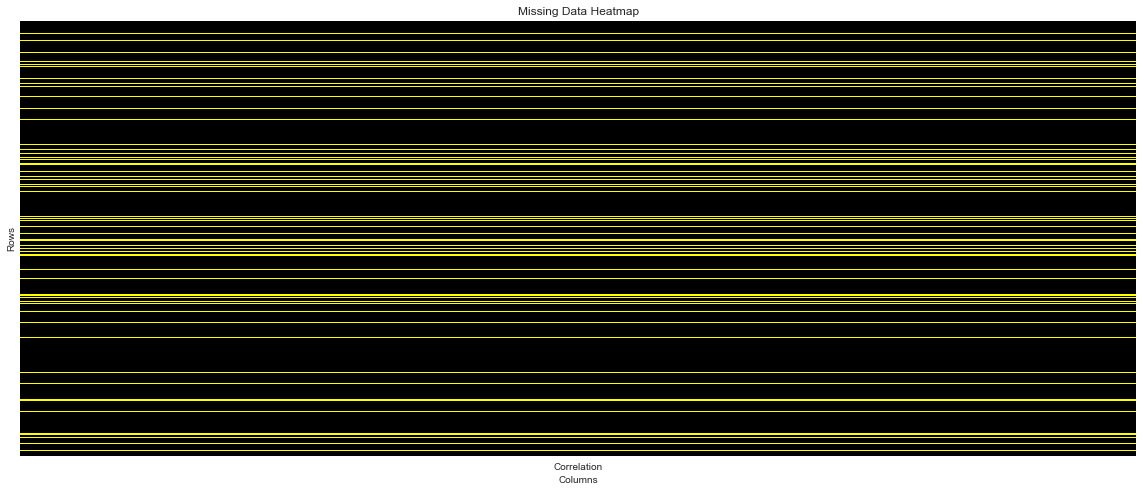

In [586]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(corr_starwars.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')            #### it makes sense because not every user will see all the movies and rate them


#### why Amelia, if you coming from R then you might have used Amelia package which detects the missing value 
#### On July 2, 1937, Amelia disappeared over the Pacific Ocean while attempting to become the first female pilot to circumnavigate the world

In [587]:
corr_starwars.dropna(inplace=True)

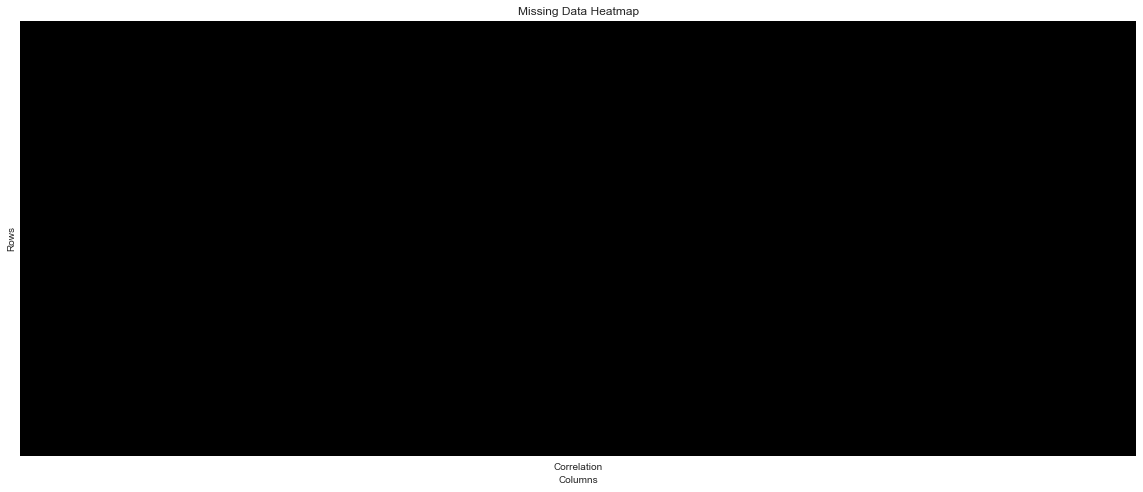

In [588]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(corr_starwars.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')


#### why Amelia, if you coming from R then you might have used Amelia package which detects the missing value 
#### On July 2, 1937, Amelia disappeared over the Pacific Ocean while attempting to become the first female pilot to circumnavigate the world

In [589]:
corr_starwars.isnull().any()

Correlation    False
dtype: bool

In [590]:
corr_starwars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1410 entries, 'Til There Was You (1997) to unknown
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Correlation  1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0+ KB


In [591]:
corr_starwars.sort_values('Correlation',ascending=False)            #### this is a problem because obviously such movies are not correlated to star wars but they getting correlation 1.0


,Correlation
title,
No Escape (1994),1.0
Commandments (1997),1.0
Cosi (1996),1.0
Man of the Year (1995),1.0
Stripes (1981),1.0
...,...
Two Deaths (1995),-1.0
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0


In [592]:
corr_starwars = corr_starwars.join(ratings.number_of_ratings)

In [593]:
corr_starwars.head()            #### now we know how many people reviewed

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [594]:
corr_starwars = corr_starwars[corr_starwars.number_of_ratings > 100].sort_values('number_of_ratings',ascending=False)

corr_starwars

#### we have opted out of number of rating below 100 so our correlation can work properly which is now working much efficiently

,Correlation,number_of_ratings
title,,
Star Wars (1977),1.000000,584
Contact (1997),0.134962,509
Fargo (1996),0.044415,508
Return of the Jedi (1983),0.672556,507
Liar Liar (1997),0.150292,485
...,...,...
Miracle on 34th Street (1994),0.310921,101
Pinocchio (1940),0.347868,101
Basic Instinct (1992),0.037229,101


In [595]:
corr_starwars.sort_values('Correlation',ascending=False)              #### now we are seeing proper recommendation system

,Correlation,number_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128
G.I. Jane (1997),-0.176734,175


In [596]:
heat = corr_starwars.sort_values('Correlation',ascending=False)

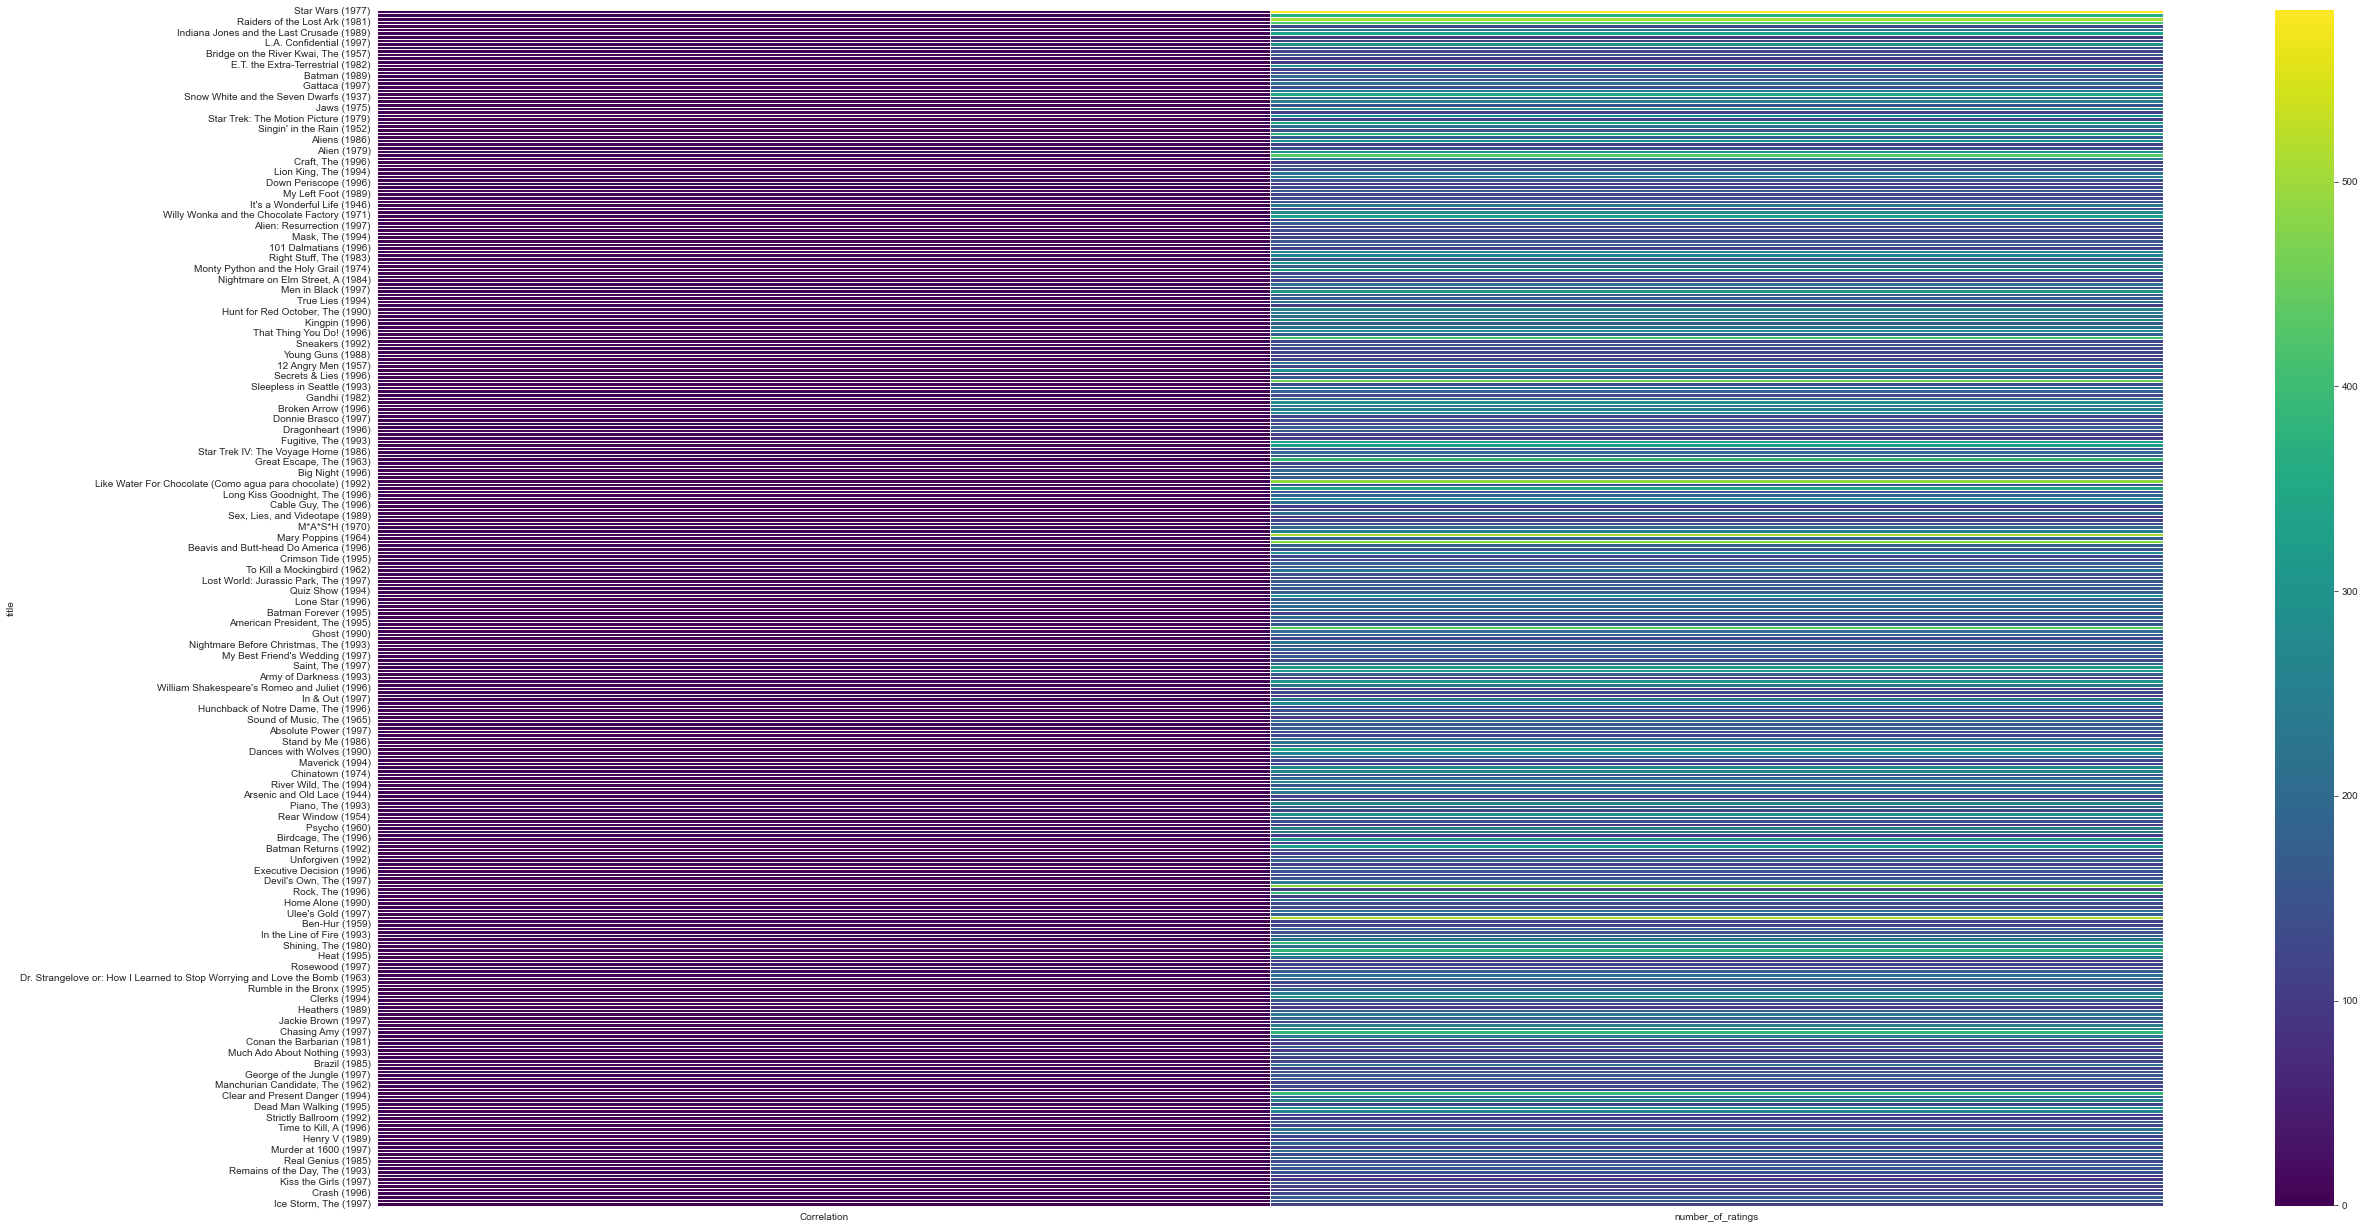

In [597]:
fig, ax = plt.subplots(figsize=(40,22))

sns.heatmap(heat,ax=ax,linewidths=0.5,cmap='viridis')


In [598]:
heat = corr_starwars.sort_values('Correlation',ascending=False).head(20)         #### top 20 highly correlated movies to star wars 1977


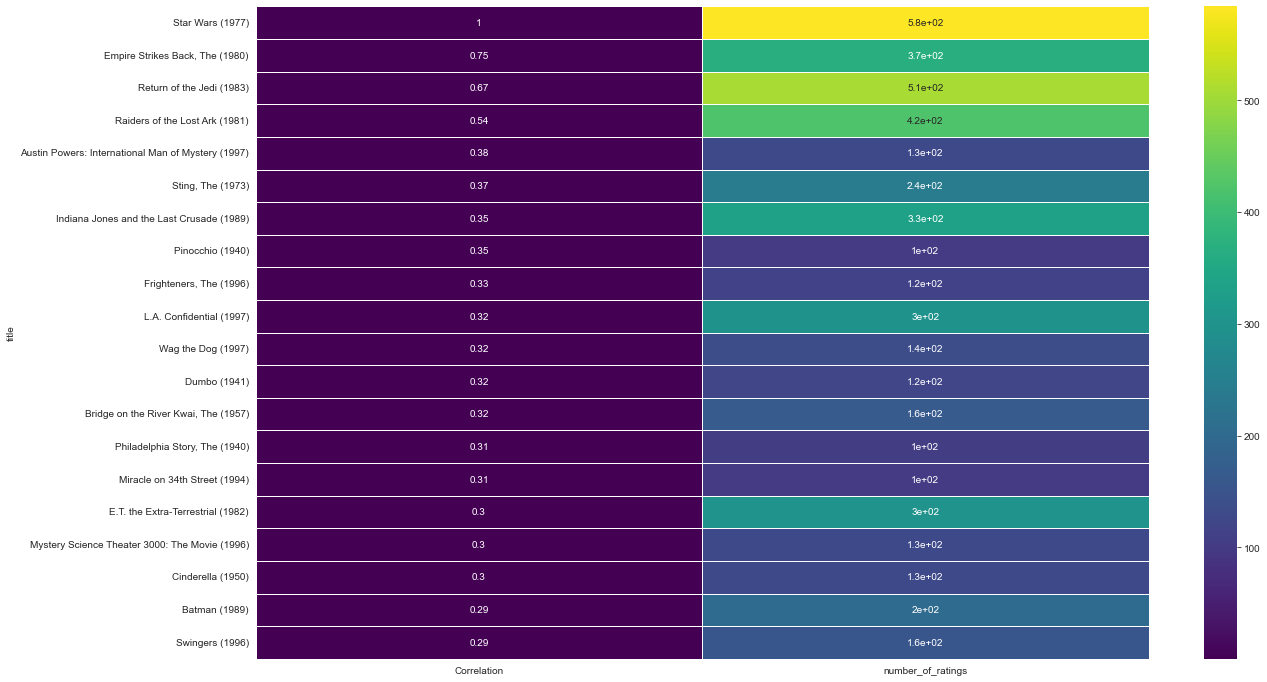

In [599]:
fig, ax = plt.subplots(figsize=(20,12))

sns.heatmap(heat,ax=ax,linewidths=0.5,cmap='viridis',annot=True)


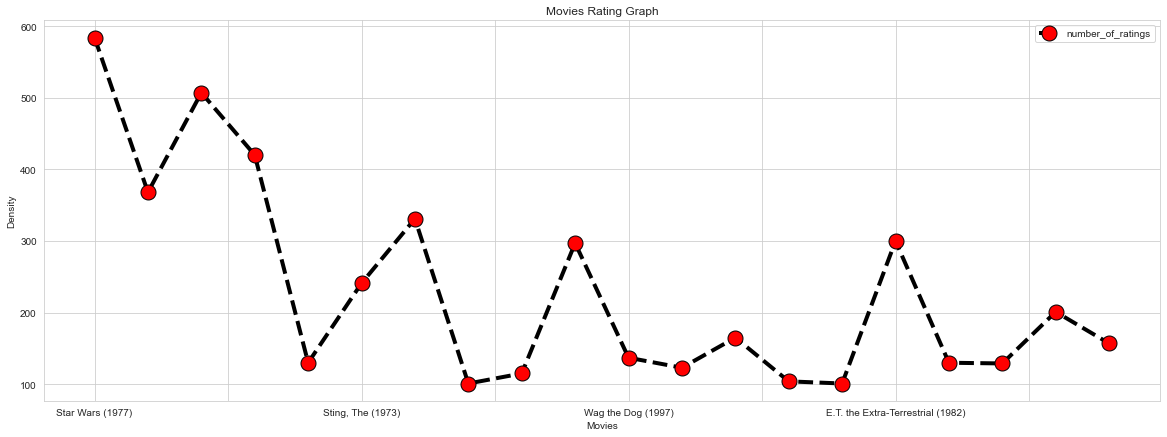

In [600]:
heat['number_of_ratings'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black',markersize=15,linestyle='dashed',linewidth=4)

plt.title('Movies Rating Graph')

plt.xlabel('Movies')

plt.ylabel('Density')

#### much better to understand

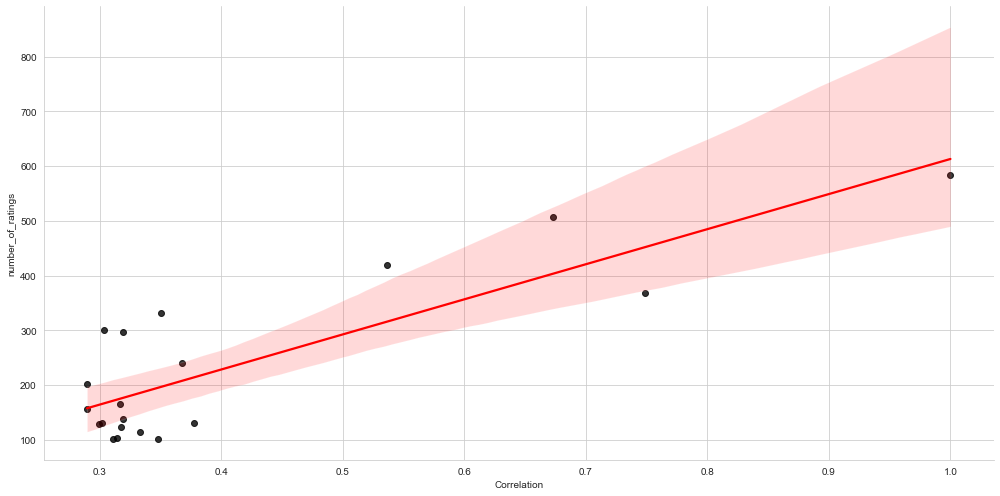

In [601]:
g = sns.lmplot(x='Correlation',y='number_of_ratings',data=heat,height=7,aspect=2,line_kws={'color':'red'},scatter_kws={'color':'black'})

plt.savefig('RS_correlation_number_ratings_lmplot.jpeg', dpi=300, bbox_inches='tight')

#### we see clear correlation, not suprised

In [484]:
#### now we will do something quite interesting, EXCITED
#### we will make a function to do all the steps in one go and when we put movie name, 
#### it reflects the recommendation based on that movie

ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [485]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [486]:
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')


In [487]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [488]:
def find_similar_movies(movie_name, min_ratings=100):
    movie_ratings = movie_matrix[movie_name]
    similar_movies = movie_matrix.corrwith(movie_ratings)
    corr_movie = pd.DataFrame(similar_movies, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(ratings['number_of_ratings'])
    recommendations = corr_movie[corr_movie['number_of_ratings'] > min_ratings].sort_values('Correlation', ascending=False)
    return recommendations


In [489]:
find_similar_movies('Star Wars (1977)').head(10)                  #### please ignore the warning, its happening on correlation phase when its trying to divide by zero, but it has no impact on the result

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,number_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [490]:
find_similar_movies('L.A. Confidential (1997)').head(10)

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,number_of_ratings
title,,
L.A. Confidential (1997),1.000000,297
Pinocchio (1940),0.721359,101
Miracle on 34th Street (1994),0.605862,101
Dumbo (1941),0.521363,123
"Nightmare Before Christmas, The (1993)",0.480821,143
"Close Shave, A (1995)",0.471677,112
Executive Decision (1996),0.461155,157
Jackie Chan's First Strike (1996),0.460642,145
Taxi Driver (1976),0.445411,182


In [491]:
find_similar_movies('Austin Powers: International Man of Mystery (1997)').head(10)

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,number_of_ratings
title,,
Austin Powers: International Man of Mystery (1997),1.000000,130
Gone with the Wind (1939),0.553188,172
Happy Gilmore (1996),0.543300,149
Mary Poppins (1964),0.517572,178
Primal Fear (1996),0.499519,178
Waterworld (1995),0.495676,102
"Nutty Professor, The (1996)",0.491236,163
Army of Darkness (1993),0.489875,116
Butch Cassidy and the Sundance Kid (1969),0.473126,216


In [492]:
find_similar_movies('Gone with the Wind (1939)').head(10)                #### one last one before we wrap this up

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,number_of_ratings
title,,
Gone with the Wind (1939),1.000000,172
Austin Powers: International Man of Mystery (1997),0.553188,130
101 Dalmatians (1996),0.512581,109
"Devil's Advocate, The (1997)",0.495044,188
"Remains of the Day, The (1993)",0.494311,150
"Hunchback of Notre Dame, The (1996)",0.474337,127
Spawn (1997),0.462450,143
Some Like It Hot (1959),0.458618,128
Batman Forever (1995),0.449045,114


In [493]:
############################################################################################################################
#### In summary, we have explored the fundamentals of building a movie recommendation system using Collaborative ###########
#### Filtering (CF) with a focus on correlation-based recommendations. By leveraging user ratings data, we can compute #####
#### similarities between movies to recommend those that align closely with a user's preferences. Our implementation #######
#### involved cleaning the dataset, creating a pivot table, calculating correlations, and filtering results to ensure ######
#### reliable recommendations. This approach, demonstrated through the example of recommending movies similar to ###########
#### "Star Wars (1977)", highlights how CF can provide personalized suggestions. ###########################################
############################################################################################################################


In [494]:
######################################################################
############## Part VII - ADVANCED RECOMMENDATION SYSTEMS
######################################################################


In [495]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [496]:
df.drop(columns='timestamp',inplace=True)

df.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [497]:
user_item_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
user_item_matrix.fillna(0, inplace=True)

user_item_matrix                             #### movie matrix without NULL

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [498]:
user_ratings_mean = np.mean(user_item_matrix, axis=1)
user_item_matrix_normalized = user_item_matrix - user_ratings_mean.values.reshape(-1, 1)

user_ratings_mean                        #### user ratings mean matrix

user_id
0      0.006611
1      0.587139
2      0.135817
3      0.088341
4      0.062500
         ...   
939    0.124399
940    0.222356
941    0.053486
942    0.199519
943    0.344351
Length: 944, dtype: float64

In [499]:
user_item_matrix_normalized                   #### normalized user rating

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,-0.006611,-0.006611,-0.006611,-0.006611,-0.006611,-0.006611,-0.006611,-0.006611,-0.006611,-0.006611,...,-0.006611,-0.006611,-0.006611,-0.006611,-0.006611,-0.006611,-0.006611,-0.006611,-0.006611,-0.006611
1,-0.587139,-0.587139,1.412861,4.412861,-0.587139,-0.587139,2.412861,3.412861,-0.587139,-0.587139,...,-0.587139,-0.587139,-0.587139,4.412861,2.412861,-0.587139,-0.587139,-0.587139,3.412861,-0.587139
2,-0.135817,-0.135817,-0.135817,-0.135817,-0.135817,-0.135817,-0.135817,-0.135817,0.864183,-0.135817,...,-0.135817,-0.135817,-0.135817,-0.135817,-0.135817,-0.135817,-0.135817,-0.135817,-0.135817,-0.135817
3,-0.088341,-0.088341,-0.088341,-0.088341,1.911659,-0.088341,-0.088341,-0.088341,-0.088341,-0.088341,...,-0.088341,-0.088341,-0.088341,-0.088341,-0.088341,-0.088341,-0.088341,-0.088341,-0.088341,-0.088341
4,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,-0.124399,-0.124399,-0.124399,-0.124399,-0.124399,-0.124399,-0.124399,-0.124399,-0.124399,-0.124399,...,-0.124399,-0.124399,-0.124399,-0.124399,-0.124399,-0.124399,-0.124399,-0.124399,-0.124399,-0.124399
940,-0.222356,-0.222356,-0.222356,-0.222356,-0.222356,-0.222356,-0.222356,-0.222356,-0.222356,-0.222356,...,-0.222356,-0.222356,-0.222356,-0.222356,-0.222356,-0.222356,-0.222356,-0.222356,-0.222356,-0.222356
941,-0.053486,-0.053486,-0.053486,-0.053486,-0.053486,-0.053486,-0.053486,-0.053486,-0.053486,-0.053486,...,-0.053486,-0.053486,-0.053486,-0.053486,-0.053486,-0.053486,-0.053486,-0.053486,-0.053486,-0.053486


In [500]:
from scipy.sparse.linalg import svds


In [501]:
U, sigma, Vt = svds(user_item_matrix_normalized, k=min(user_item_matrix_normalized.shape)-1)
sigma = np.diag(sigma)

sigma                        #### setting up SVD, we are basically breaking down whole normalized matrix into 3 components as U * sigma * Vt = original normalized matrix


array([[  0.61261828,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.65637844,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.70471691, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 217.19384938,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        244.12084822,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 521.27489713]])

In [502]:
predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.values.reshape(-1, 1)
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns)

predicted_ratings_df                 #### so basically this is our predicted ratings for all the user

#### you will see the predicted ratings are pretty much on point because our model basically had the leak data meaning we didn't split anything to test our predictions
#### next we will do the classic spliting and testing and then comparing the RMSE to see how well our predictions were

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
0,-9.827411e-06,8.540084e-06,-0.000212,0.001016,0.000154,0.000253,-4.651019e-05,0.000498,-0.000269,0.000144,...,-1.076621e-05,0.002047,-0.000064,-0.000081,0.000596,-0.000624,0.000842,0.000825,-0.001332,0.000072
1,2.149462e-07,-1.867896e-07,2.000005,4.999978,-0.000003,-0.000006,3.000001e+00,3.999989,0.000006,-0.000003,...,2.354796e-07,-0.000045,0.000001,5.000002,2.999987,0.000014,-0.000018,-0.000018,4.000029,-0.000002
2,1.557599e-06,-1.353563e-06,0.000034,-0.000161,-0.000024,-0.000040,7.371647e-06,-0.000079,1.000043,-0.000023,...,1.706393e-06,-0.000324,0.000010,0.000013,-0.000095,0.000099,-0.000133,-0.000131,0.000211,-0.000011
3,2.703706e-06,-2.349538e-06,0.000058,-0.000280,1.999958,-0.000070,1.279583e-05,-0.000137,0.000074,-0.000040,...,2.961987e-06,-0.000563,0.000018,0.000022,-0.000164,0.000172,-0.000232,-0.000227,0.000367,-0.000020
4,8.711256e-06,-7.570137e-06,0.000188,-0.000901,-0.000137,-0.000225,4.122776e-05,-0.000441,0.000238,-0.000128,...,9.543426e-06,-0.001814,0.000057,0.000071,-0.000529,0.000553,-0.000746,-0.000731,0.001181,-0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1.887599e-06,-1.640336e-06,0.000041,-0.000195,-0.000030,-0.000049,8.933442e-06,-0.000096,0.000052,-0.000028,...,2.067918e-06,-0.000393,0.000012,0.000015,-0.000115,0.000120,-0.000162,-0.000158,0.000256,-0.000014
940,-2.352128e-07,2.044014e-07,-0.000005,0.000024,0.000004,0.000006,-1.113192e-06,0.000012,-0.000006,0.000003,...,-2.576822e-07,0.000049,-0.000002,-0.000002,0.000014,-0.000015,0.000020,0.000020,-0.000032,0.000002
941,4.510534e-06,-3.919684e-06,0.000097,-0.000466,-0.000071,-0.000116,2.134701e-05,-0.000229,0.000123,-0.000066,...,4.941418e-06,-0.000939,0.000029,0.000037,-0.000274,0.000287,-0.000386,-0.000379,0.000612,-0.000033
942,6.848073e-07,-5.951020e-07,0.000015,-0.000071,-0.000011,-0.000018,3.240987e-06,2.999965,0.000019,2.999990,...,7.502257e-07,-0.000143,0.000004,0.000006,-0.000042,0.000044,-0.000059,-0.000057,0.000093,-0.000005


In [503]:
user_item_matrix.head()                 #### this is the actual ratings

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [505]:
user_id = 2
user_idx = user_id - 1  # user_id is 1-indexed because python indexes from 0

predicted_ratings_df.iloc[user_idx].head()                #### we are doing the predicted ratings for user 2

title
'Til There Was You (1997)    2.149462e-07
1-900 (1994)                -1.867896e-07
101 Dalmatians (1996)        2.000005e+00
12 Angry Men (1957)          4.999978e+00
187 (1997)                  -3.371651e-06
Name: 1, dtype: float64

In [506]:
predicted = predicted_ratings_df.values.flatten()
actual = user_item_matrix.values.flatten()

actual                         #### preparing for RMSE

array([0., 0., 0., ..., 0., 0., 0.])

In [507]:
predicted

array([-9.82741128e-06,  8.54008391e-06, -2.12207981e-04, ...,
       -1.50176023e-05,  2.42526816e-05, -1.31164912e-06])

In [508]:
mask = actual != 0
rmse = np.sqrt(mean_squared_error(predicted[mask], actual[mask]))

rmse               #### just like we predicted as the data is leaked so it doesn't suprise us why RMSE is so small here

0.00016331591494779388

In [510]:
import implicit
from sklearn.model_selection import train_test_split


In [518]:
df = df.drop_duplicates(subset=['user_id', 'title'])


In [519]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)


In [520]:
train_user_item_matrix = train_data.pivot(index='user_id', columns='title', values='rating').fillna(0)
test_user_item_matrix = test_data.pivot(index='user_id', columns='title', values='rating').fillna(0)

#### giving same treatment for both test and train data

In [521]:
user_ratings_mean = np.mean(train_user_item_matrix, axis=1)
train_user_item_matrix_normalized = train_user_item_matrix - user_ratings_mean.values.reshape(-1, 1)

#### normalizing the data for train

In [522]:
U, sigma, Vt = svds(train_user_item_matrix_normalized, k=50)
sigma = np.diag(sigma)

#### applying SVD

In [523]:
pred = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.values.reshape(-1, 1)
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=train_user_item_matrix.columns)

predicted_ratings_df.head()               #### using SVD and normalizing to get the predicted df

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
0,-0.015187,-0.007550,0.164693,0.160648,0.007119,-0.058572,-0.072616,-0.171759,-0.007529,-0.041893,...,-0.003859,-0.031335,-0.006751,-0.257736,0.044956,-0.017162,-0.055264,0.007841,0.030764,0.006020
1,-0.151465,-0.214356,0.466083,3.125567,0.339244,1.333409,1.323793,4.773232,0.018281,-0.457995,...,-0.052899,0.106914,0.010190,5.137473,0.713224,-0.120128,0.201260,-0.088736,-0.011361,0.063405
2,0.011060,-0.013906,0.150618,0.055261,0.109809,0.269144,-0.316108,-1.283790,-0.012456,0.026111,...,-0.018769,-0.014417,-0.005900,-0.561194,-0.194925,0.003666,0.150529,0.001315,0.088823,0.044595
3,0.020446,0.028061,-0.020983,-0.148822,0.386620,0.057446,-0.326245,-0.071626,0.017619,-0.200636,...,-0.006089,0.122380,-0.013770,0.052524,0.063978,-0.140124,0.024131,-0.017788,-0.002573,0.020792
4,0.027457,-0.012636,-0.097168,0.016259,0.330279,-0.047671,0.024006,0.030351,0.005271,0.038105,...,0.002347,0.028073,-0.001551,-0.011866,0.053785,0.184304,-0.040597,-0.012891,0.018577,-0.007124


In [527]:
test_user_item_matrix_aligned = test_user_item_matrix.reindex(index=predicted_ratings_df.index, columns=predicted_ratings_df.columns).fillna(0)
rmse = np.sqrt(mean_squared_error(test_user_item_matrix_aligned.values.flatten(), predicted_ratings_df.values.flatten()))

rmse                        #### not bad knowing our ratings go from 1-5

0.6925543395171082

In [529]:
from scipy.sparse import coo_matrix                       #### lets see more advanced method like ALS to reduce RMSE


In [528]:
sparse_train_matrix = coo_matrix(train_user_item_matrix.values)

sparse_train_matrix                  #### we will be doing ALS so we need it in this format

<944x1616 sparse matrix of type '<class 'numpy.float64'>'
	with 69787 stored elements in COOrdinate format>

In [530]:
from implicit.als import AlternatingLeastSquares


In [531]:
als_model = AlternatingLeastSquares(factors=50, regularization=0.1, iterations=20)


In [532]:
als_model.fit(sparse_train_matrix.T)


C:\Users\USER\Anaconda3\lib\site-packages\implicit\utils.py:167: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0009980201721191406 seconds
  ParameterWarning,


In [533]:
user_factors = als_model.user_factors
item_factors = als_model.item_factors


In [534]:
predicted_ratings = np.dot(user_factors, item_factors.T).T

#### transposing the factors

In [535]:
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=train_user_item_matrix.index, columns=train_user_item_matrix.columns)

#### making into a dataframe

In [536]:
test_user_item_matrix_aligned = test_user_item_matrix.reindex(index=predicted_ratings_df.index, columns=predicted_ratings_df.columns).fillna(0)
rmse = np.sqrt(mean_squared_error(test_user_item_matrix_aligned.values.flatten(), predicted_ratings_df.values.flatten()))

rmse             #### we did reduce RMSE from 0.69 to 0.51 which is amazing and massive improvement

0.5107788853059855

In [ ]:
############################################################################################################################
#### In our recommendation system project, we have achieved significant results through a methodical approach. #############
#### Initially, we implemented Singular Value Decomposition (SVD) and obtained an RMSE of 0.69. Subsequently, we ###########
#### improved our model using Alternating Least Squares (ALS), achieving a further reduced RMSE of 0.50.While we ###########
#### considered exploring more advanced methods such as neural networks, we have decided to conclude our work at this ######
#### stage, satisfied with the improvements and insights gained from ALS. ##################################################
############################################################################################################################
